# OMIS 114 Data Science with Python
## Assignment 6 - Classification

#### Due March 2 at 3:50PM :: 100 Points Total

**Description:**<br>Perform an analysis of the passenger data from the Titanic's ill-fated voyage in 1912.<br>The goal of the analysis is to use decision trees to find out what factors made it more or less likely for a passenger to survive the ship's sinking.<br>Use the Titanic data file to answer the following questions.<br>Prepare this Jupyter notebook file to professionally present your analysis.

<ul>
<li>Expand the notebook (insert cells) as required.</li>
<li>To respond to the questions in this noteboook, generate a response in the cell immediately following a question.</li>
<li>Progress points are associated with an analysis task, and are assigned based upon an assessment of the progress made toward performing the analysis task completely and correctly and generating the correct solution values.</li>
<li>Performing an analysis task correctly and generating the correct solution values earns complete progress points.</li>
<li>Up to 6 progress points for notebook presentation, professionalism, and description of analysis steps (comments).</li>
</ul>

<ul>
<li>Include all steps of the analysis in the submitted notebook.</li>
<li>To earn points on a question, the notebook analysis must compute the value provided.</li>
<li>Include a comment describing each step of the analysis (excluding questions involving a written response).</li>
<li>The analysis code should also function on any other similar passenger data.</li>
<li>Additional Python packages (besides those imported) may not be used in the analysis.</li>
<li>Complete this assignment independently, without inappropriate collaboration or assistance.</li>
</ul>

In [7]:
import os

os.environ["PATH"] += os.pathsep + 'E:\Program Files\Anaconda\Install\Library\bin\graphviz\bin'

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

In [9]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Data cleaning

Start by cleaning the data set. This part is already done for you. Just execute the code below.

In [10]:
df = pd.read_csv("titanic.csv")

Drop less informative attributes

In [11]:
df.drop(['Name', 'Ticket', 'PassengerId', 'Cabin'], axis=1, inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


Binarize gender

In [12]:
df['Male'] = df.Sex == 'male'
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Male
0,0,3,male,22.0,1,0,7.2500,S,True
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,False
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,True
887,1,1,female,19.0,0,0,30.0000,S,False
888,0,3,female,NaN,1,2,23.4500,S,False
889,1,1,male,26.0,0,0,30.0000,C,True


In [13]:
df.drop(['Sex'], axis=1, inplace=True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Male
0,0,3,22.0,1,0,7.2500,S,True
1,1,1,38.0,1,0,71.2833,C,False
2,1,3,26.0,0,0,7.9250,S,False
3,1,1,35.0,1,0,53.1000,S,False
4,0,3,35.0,0,0,8.0500,S,True
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,True
887,1,1,19.0,0,0,30.0000,S,False
888,0,3,NaN,1,2,23.4500,S,False
889,1,1,26.0,0,0,30.0000,C,True


Create dummy variables for port of origin

In [8]:
df = pd.get_dummies(data=df, columns=['Embarked'])

Remove NaN values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Male        891 non-null    bool   
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
dtypes: bool(1), float64(2), int64(4), uint8(3)
memory usage: 45.4 KB


In [10]:
df.isna().any()

Survived      False
Pclass        False
Age            True
SibSp         False
Parch         False
Fare          False
Male          False
Embarked_C    False
Embarked_Q    False
Embarked_S    False
dtype: bool

In [11]:
df.Age.isna().sum()

177

In [12]:
len(df)

891

In [13]:
df.dropna(inplace=True)

In [14]:
len(df)

714

In [15]:
len(df) + 177 == 891

True

In [16]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,0,0,1
1,1,1,38.0,1,0,71.2833,False,1,0,0
2,1,3,26.0,0,0,7.9250,False,0,0,1
3,1,1,35.0,1,0,53.1000,False,0,0,1
4,0,3,35.0,0,0,8.0500,True,0,0,1


## Data set description
After cleaning, the data frame **df**, reports the passengers of the Titanic (one row per passenger). The columns are:
<ul>
<li><b>Survived</b>: binary class label attribute that indicates whether the passenger survived or not.<br>This is the dependent variable to explore and predict in the classification.
<li><b>Pclass</b>: Ticket class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
<li><b>Age</b>: Passenger age
<li><b>SibSp</b>: The number of passenger's siblings/spouses aboard the Titanic
<li><b>Parch</b>: The number of passenger's parents/children aboard the Titanic
<li><b>Fare</b>: The passenger's ticket fare
<li><b>Male</b>: binary attibute that indicates the passenger's gender (1=Male, 0=Female)
<li><b>Embarked_C</b>: binary attibute that indicates whether the passenger embarked in Cherbourg
<li><b>Embarked_Q</b>: binary attibute that indicates whether the passenger embarked in Queenstown
<li><b>Embarked_S</b>: binary attibute that indicates whether the passenger embarked in Southampton
</ul>

#### Use the data frame df to answer the following questions.

#### Question 1:<br><br>Develop and visualize a decision tree of depth = 1 (one root and two leaf nodes) to determine the differences between the passengers who survived the Titanic sinking and the passengers who did not (binary class label in the 'Survived' column).<br><br>14 progress points for decision tree development and visualization

In [17]:
dt = tree.DecisionTreeClassifier(max_depth=1)

In [18]:
X = df.drop('Survived',axis=1)
Y = df.Survived
dt.fit(X,Y)

DecisionTreeClassifier(max_depth=1)

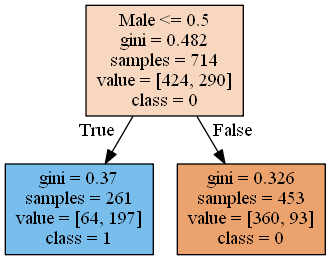

In [19]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

#### Question 2:<br><br>In a written response (3 to 5 lines) in the markdown cell below, interpret the decision tree developed in question 1, and describe any insights you've derived from this analysis about the differences between the passengers who survived the Titanic sinking and the passengers who did not.<br><br>12 progress points for quality of written response

This decision tree compared 714 samples where 424 were died and 290 survived. However, the gini index is high, which may result in some miscategorizations. Out of the 424 who died, 64 of which were females, while 360 were males. Out of 290 who survived, 197 of which were female and 93 were male.

#### Question 3:<br><br>Use seaborn to generate an effective visualization that presents and confirms the insights you've described in question 2. Also, provide a short written description (2 to 3 lines) of the visualization, the reasoning behind its selection and design, and the information presented regarding passenger survival and the predictors.<br><br>5 progress points for visualization development and effectiveness; 5 progress points for quality of written response

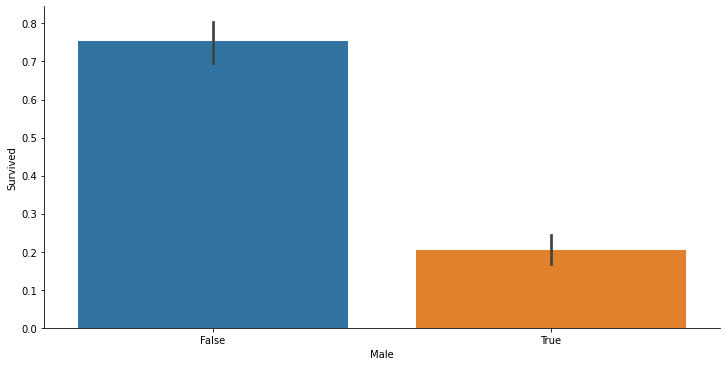

In [20]:
sns.catplot(x='Male', y='Survived', \
           kind='bar', data=df, aspect=2)

In this bar chart, I have plotted the number of surviors based on gender, where false = female and true = male, because I felt that a bar chart would be the most logical for a comparasion between the count of two categories. This bar chart shows that a significant amount of females survived over males, which backs up the results from the decision tree.

#### Question 4:<br><br>Develop and visualize a decision tree of depth = 2 to determine the differences between the passengers who survived the Titanic sinking and the passengers who did not (binary class label in the 'Survived' column). The tree should have four leaves.<br><br>16 progress points for decision tree development and visualization

In [21]:
dt2 = tree.DecisionTreeClassifier(max_depth=2)

In [22]:
X = df.drop('Survived',axis=1)
Y = df.Survived
dt2.fit(X,Y)

DecisionTreeClassifier(max_depth=2)

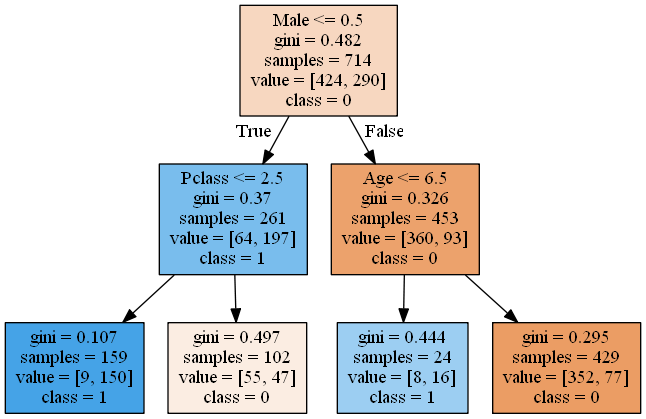

In [23]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]
tree.export_graphviz(dt2, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

#### Question 5:<br><br>In a written response (4 to 5 lines) in the markdown cell below, interpret the decision tree developed in question 4, and describe any insights you've derived from this analysis about the differences between the passengers who survived the Titanic sinking and the passengers who did not.<br><br>14 progress points for quality of written response

On top of the details from the previous answer, out of the 453 males, 24 were less than the age of 6.5 with a high gini index while 429 were above the age of 6.5 with a low gini index. Of the males who were less than the age of 6.5, 8 did not survive and 16 survived, while 352 males above 6.5 of age did not survive and 77 survived. Furthermore, out of the 261 females, 159 were in 1st or 2nd class with a very low gini index, while 102 females with a high gini index were in the 3rd class. Of the females who were in 1st or second class, 9 did not survive and 150 did survive, but for females in the 3rd class 55 died and only 47 survived.

#### Question 6:<br><br>The decision tree developed for question 4 involves three predictors of passenger survival (at the root of the tree and two branches). Guided by your evaluation of the decision tree, generate an effective visualization using seaborn that presents and confirms your insights regarding passenger survival and the predictors. This visualization should include two of the three predictors, along with passenger survival - the predictor at the root of the decision tree, and the predictor on the left branch of the decision tree. Also, provide a short written description (4 to 5 lines) of the visualization, the reasoning behind its selection and design, and the information presented regarding passenger survival and the predictors.<br><br>7 progress points for visualization development and effectiveness; 7 progress points for quality of written response

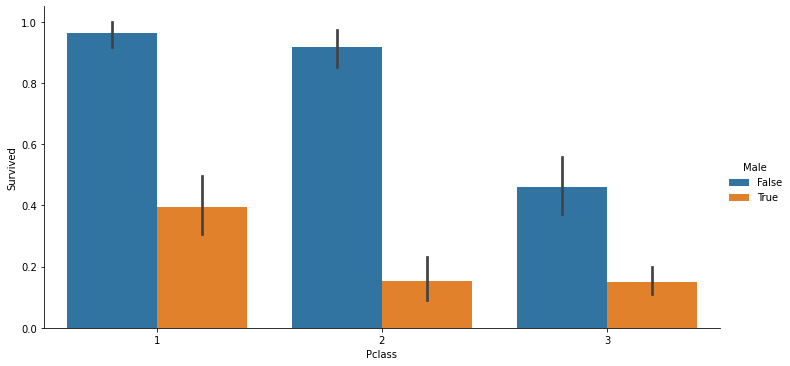

In [24]:
sns.catplot(x='Pclass', y='Survived', \
            hue='Male', kind='bar', data=df, aspect=2)

This visualization shows that amongst females there is a significnat disparity between the survial of those of which who were in 1st and 2nd class compared to those in the 3rd class, which conforms to the results from the decision tree. I choose a bar chart visualization to show the survivor count over the class because I felt that this showed the clearest division between the survivor count from females in 1st/2snd class compared to females in the 3rd class.

#### Question 7:<br><br>The decision tree developed for question 4 involves three predictors of passenger survival (at the root of the tree and two branches). Guided by your evaluation of the decision tree, generate an effective visualization using seaborn that presents and confirms your insights regarding passenger survival and the predictors. This visualization should include two of the three predictors, along with passenger survival - the predictor at the root of the decision tree, and the predictor on the right branch of the decision tree. Also, provide a short written description (4 to 5 lines) of the visualization, the reasoning behind its selection and design, and the information presented regarding passenger survival and the predictors.<br><br>7 progress points for visualization development and effectiveness; 7 progress points for quality of written response

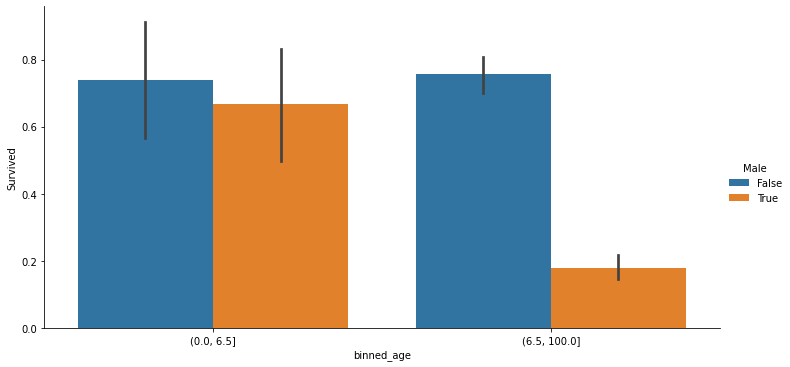

In [27]:
df['binned_age'] = pd.cut(df['Age'], bins=[0,6.5,100])
sns.catplot(x='binned_age', y='Survived', \
            hue='Male', kind='bar', data=df, aspect=2)

This visualization demonstrates that amongst males there is a significant difference between the survivors of those who were younger than 6.5 compared to those older than 6.5. I choose to use a bar chart because there are only 2 categories within the ages, which in my opnion is much clearer on the significant difference between the survival rate of males under 6.5 of age and those over 6.5 years of age. 